In [3]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid, plot_contourf_rotated_grid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings

In [4]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1979
last_year = 1980
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [5]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      compute_hist = True,
                                      #compute_hist = False,
                                      exp=exp_ERA5,
                                      var_names_ls = ["IVT"],#,"IWV"],
                                      var_paths_ls = ["/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVT/"],#,
                                                     # "/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IWV/"]
                                      
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-1980_IVT exists. Loading...
/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-1980_IVT_withHist exists. Loading...
Computing history
Saving /work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-1980_IVT_withHist


In [10]:
IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(Season.DJF).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.00001, select_last_timesteps=True)


In [11]:
len(IVTobjs_sel_ERA5)

22

In [13]:
IVTobjs_sel_ERA5[0].get_track()

AttributeError: 'Dataset' object has no attribute 'get_track'

IWV(value=48.0)

In [4]:
IVT_objs_ERA5[0]

/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:21: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


<xarray.Dataset> Size: 2kB
Dimensions:          (times: 23)
Coordinates:
  * times            (times) datetime64[ns] 184B 1979-01-01T01:00:00 ... 1979...
Data variables: (12/14)
    id_              <U1 4B '1'
    exp              object 8B <class 'src.Experiments_infos.ERA5'>
    size             (times) float64 184B 9.171e+05 9.221e+05 ... 7.558e+03
    total_IVT        (times) float32 92B 1.319e+05 1.316e+05 ... 5.222e+03 707.6
    mean_IVT         (times) float32 92B 159.0 157.6 157.8 ... 106.7 102.4 101.1
    max_IVT          (times) float32 92B 252.0 249.8 247.8 ... 118.5 105.4 102.9
    ...               ...
    mass_center_idx  (times) float64 184B 13.25 13.59 13.62 ... 23.45 21.29
    track            (times) object 184B RotatedGridPoint(lat=-5.300000190734...
    speed            (times) float64 184B nan 37.7 34.79 ... 66.32 162.1 93.04
    gridpoints       (times) object 184B [RotatedGridPoint(lat=-11.0, lon=-24...
    IVT              (times) object 184B {RotatedGridPoint(lat=-11.0, lon=-24...
    history          (times) int64 184B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

Season.DJF
Season.MAM
Season.JJA
Season.SON


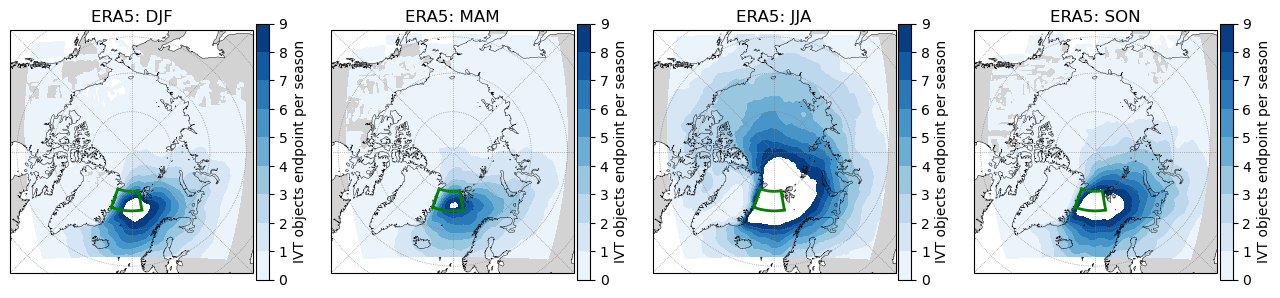

In [37]:
fig = plt.figure(figsize=(13,3))
subplts = (1,4)
levels=np.arange(0,10,1)
for  season_,i in zip(Season,[0,1,2,3]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)


    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects after passing region per season",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True)
        
   
    
plt.tight_layout()